In [2]:
# Importing necessary packages
import pandas_datareader.data as reader # For reading stock data into Jupyter
import pandas as pd # For data handling
import datetime as dt  # For time period initialisation
import requests   # Data requesting
import numpy as np  # Caluclations and computations
from scipy.stats import percentileofscore as score   # used in QMS
from math import floor  # used in QMS
import seaborn as sns  # plotting
import matplotlib.pyplot as plt  # plotting
import matplotlib 

In [3]:
# Retrieving ticker symbols for stocks contained in FSTE 100
table = pd.read_html(requests.get(
    'https://uk.finance.yahoo.com/quote/%5EFTSE/components?p=%5EFTSE', headers={'User-agent': 'Mozilla/5.0'}).text)[0]
tickers = table.Symbol.tolist()

In [4]:
# Getting prices for the FSTE 100 components
start = dt.datetime.now() - dt.timedelta(days=365*15)
end = dt.datetime.now()

In [5]:
# Only interested in adjusted close price of those assets 
pd.set_option('display.max_rows', 4000)
df = reader.get_data_yahoo(tickers, start, end)['Adj Close']
df = df.reset_index()
df

Symbols       Date        STJ.L       AAF.L       EXPN.L        PRU.L  \
0       2007-09-27   232.403641         NaN   392.477570   380.072937   
1       2007-09-28   231.180374         NaN   387.234436   382.618622   
2       2007-10-01   229.498505         NaN   387.608978   390.255768   
3       2007-10-02   227.510880         NaN   393.600952   382.364105   
4       2007-10-03   245.246948         NaN   394.724487   385.673492   
5       2007-10-04   255.643936         NaN   405.585022   388.219177   
6       2007-10-05   255.338165         NaN   411.202606   388.473877   
7       2007-10-08   255.643936         NaN   408.206635   394.583405   
8       2007-10-09   256.867157         NaN   406.708557   393.565125   
9       2007-10-10   252.891876         NaN   378.246490   396.111023   
10      2007-10-11   251.362854         NaN   380.867950   395.856201   
11      2007-10-12   249.528107         NaN   373.003448   396.111023   
12      2007-10-15   239.436890         NaN   366.262421   379.054565   
13      2007-10-16   228.734039         NaN   356.899902   373.963226   
14      2007-10-17   231.944931         NaN   366.824127   379.818329   
15      2007-10-18   229.957321         NaN   359.521454   372.435944   
16      2007-10-19   226.899338         NaN   355.776337   373.708618   
17      2007-10-22   226.134781         NaN   347.724548   371.672089   
18      2007-10-23   229.039932         NaN   358.585083   379.054565   
19      2007-10-24   225.981934         NaN   356.525482   379.054565   
20      2007-10-25   232.097748         NaN   360.832153   396.619965   
21      2007-10-26   227.969574         NaN   372.254364   399.420288   
22      2007-10-29   234.544144         NaN   374.314240   395.092621   
23      2007-10-30   230.874649         NaN   369.632965   391.019470   
24      2007-10-31   237.296280         NaN   377.871918   398.147308   
25      2007-11-01   229.192764         NaN   371.130981   383.891449   
26      2007-11-02   227.205139         NaN   363.266357   383.891449   
27      2007-11-05   221.395020         NaN   347.911926   376.508911   
28      2007-11-06   218.337067         NaN   350.720551   379.054565   
29      2007-11-07   201.824188         NaN   337.051300   363.780396   
30      2007-11-08   188.216370         NaN   338.362000   355.888824   
31      2007-11-09   177.360641         NaN   337.800323   345.196838   
32      2007-11-12   186.687408         NaN   349.035309   349.269989   
33      2007-11-13   186.075790         NaN   352.780396   352.070251   
34      2007-11-14   189.745331         NaN   355.589172   352.324768   
35      2007-11-15   186.075790         NaN   321.696716   344.178619   
36      2007-11-16   181.030167         NaN   313.083221   335.014130   
37      2007-11-19   169.868698         NaN   310.836182   320.758087   
38      2007-11-20   169.868698         NaN   322.632965   330.431732   
39      2007-11-21   156.566635         NaN   312.521423   314.648438   
40      2007-11-22   160.694855         NaN   310.274475   319.485321   
41      2007-11-23   169.410019         NaN   318.326233   336.032379   
42      2007-11-26   170.633179         NaN   313.644989   321.776459   
43      2007-11-27   167.728149         NaN   307.465637   317.703247   
44      2007-11-28   185.922882         NaN   320.386017   336.286865   
45      2007-11-29   182.253387         NaN   318.700714   334.759460   
46      2007-11-30   186.228699         NaN   318.326233   345.705963   
47      2007-12-03   182.864990         NaN   319.075256   336.796051   
48      2007-12-04   177.207764         NaN   313.457794   329.158844   
49      2007-12-05   179.807007         NaN   319.824127   341.887451   
50      2007-12-06   177.819351         NaN   309.338165   344.942322   
51      2007-12-07   182.559189         NaN   309.338165   354.615936   
52      2007-12-10   191.580093         NaN   307.652924   364.798828   
53      2007-12-11   197.543106         NaN   299.226685  

In [6]:
# Checking for NaN values
print(df.isnull().values.any())

# Dropping all rows holding NaN values
df_clean = df.dropna()
df_clean
# After first attempt of cleaning, it was found that the majority of the dataset had been deleted!
# It was observed that two stocks (HLN.L and CCH.L) had many NaNs and that possibly, NaNs all the way up to 2022.
# Deeper analysis of these NaN values was required...

True


Symbols       Date        STJ.L       AAF.L  EXPN.L        PRU.L       VOD.L  \
3740    2022-07-18  1134.510986  159.600006  2768.0  1005.200134  130.119995   
3741    2022-07-19  1146.842651  163.399994  2780.0  1017.137207  131.000000   
3742    2022-07-20  1140.923462  164.699997  2759.0  1000.226379  129.259995   
3743    2022-07-21  1169.039551  165.399994  2835.0   996.744690  129.600006   
3744    2022-07-22  1169.039551  164.699997  2834.0   997.242126  129.020004   
3745    2022-07-25  1170.026123  168.600006  2781.0   981.226562  129.020004   
3746    2022-07-26  1129.578369  170.300003  2741.0   979.038086  122.360001   
3747    2022-07-27  1135.004272  170.899994  2753.0   973.268494  121.019997   
3748    2022-07-28  1186.303955  158.300003  2810.0   975.655884  118.800003   
3749    2022-07-29  1210.967163  158.800003  2863.0  1000.723755  120.800003   
3750    2022-08-01  1204.554688  159.800003  2869.0   968.493652  120.500000   
3751    2022-08-02  1183.837524  159.300003  2855.0   953.174438  120.720001   
3752    2022-08-03  1201.101929  154.199997  2896.0   971.080017  118.860001   
3753    2022-08-04  1214.913330  149.100006  2927.0   975.059082  118.639999   
3754    2022-08-05  1202.581665  153.000000  2846.0   968.692627  121.440002   
3755    2022-08-08  1211.953735  152.100006  2897.0   997.242126  121.019997   
3756    2022-08-09  1190.250000  154.199997  2859.0   984.011841  122.279999   
3757    2022-08-10  1227.738281  153.399994  2942.0   988.985657  121.220001   
3758    2022-08-11  1242.042969  145.899994  2923.0   984.807678  121.220001   
3759    2022-08-12  1237.110229  144.300003  2919.0   991.770935  121.580002   
3760    2022-08-15  1241.056396  143.500000  2939.0   985.603455  121.139999   
3761    2022-08-16  1232.177612  145.899994  2892.0   983.812927  123.220001   
3762    2022-08-17  1212.447021  146.199997  2877.0   944.619507  121.779999   
3763    2022-08-18  1221.819092  144.300003  2900.0   973.000000  121.559998   
3764    2022-08-19  1204.554688  141.399994  2866.0   958.799988  121.739998   
3765    2022-08-22  1155.721436  141.100006  2833.0   941.200012  119.879997   
3766    2022-08-23  1151.775269  137.199997  2793.0   953.799988  117.379997   
3767    2022-08-24  1141.910034  136.800003  2798.0   930.000000  116.279999   
3768    2022-08-25  1147.000000  136.399994  2775.0   916.400024  116.559998   
3769    2022-08-26  1125.500000  135.500000  2683.0   915.000000  115.080002   
3770    2022-08-30  1122.000000  134.699997  2653.0   910.200012  115.720001   
3771    2022-08-31  1107.000000  132.300003  2623.0   903.599976  115.680000   
3772    2022-09-01  1044.000000  131.300003  2552.0   881.599976  112.180000   
3773    2022-09-02  1087.000000  131.699997  2621.0   936.599976  113.839996   
3774    2022-09-05  1070.500000  132.500000  2605.0   919.200012  112.339996   
3775    2022-09-06  1107.000000  133.199997  2608.0   933.000000  113.180000   
3776    2022-09-07  1117.500000  134.100006  2621.0   917.599976  110.180000   
3777    2022-09-08  1130.000000  137.100006  2692.0   938.000000  107.900002   
3778    2022-09-09  1143.000000  139.600006  2730.0   961.400024  108.480003   
3779    2022-09-12  1167.500000  144.000000  2798.0   976.400024  110.559998   
3780    2022-09-13  1127.000000  143.699997  2734.0   959.200012  109.099998   
3781    2022-09-14  1090.000000  139.100006  2722.0   938.000000  107.120003   
3782    2022-09-15  1093.500000  139.000000  2687.0   950.799988  109.239998   
3783    2022-09-16  1093.000000  135.800003  2661.0   957.599976  108.360001   
3784    2022-09-20  1072.000000  135.000000  2605.0   953.799988  106.379997   
3785    2022-09-21  1095.000000  138.899994  2666.0   957.599976  108.779999   
3786    2022-09-22  1060.000000  136.899994  2577.0   934.200012  108.860001   
3787    2022-09-23  1059.500000  137.199997  2571.0   928.599976  108.000000   

Symbols       SMT.L  BATS.L      TSCO.L        BA.L  ...       SHEL.L  \
3740  

In [7]:
# Exploring quantities of null values in each column (stock)
for col in df:
    null_sum = df[col].isnull().sum()
    print(col, null_sum)

Date 0
STJ.L 0
AAF.L 2970
EXPN.L 1
PRU.L 0
VOD.L 0
SMT.L 0
BATS.L 1
TSCO.L 1
BA.L 0
CPG.L 1
RR.L 0
SMIN.L 0
CCH.L 1410
RTO.L 1
SSE.L 0
FRAS.L 0
ABF.L 0
RMV.L 0
PSN.L 0
MNG.L 3049
SHEL.L 1
HLN.L 3740
SPX.L 0
AHT.L 0
RS1.L 10
ENT.L 0
CNA.L 0
SDR.L 0
AUTO.L 1889
ANTO.L 0


In [10]:
# Analysis of NaN values shows large frequencies in MNG.L, AAF.L, AUTO.L, CCH.L and HLN.L.
# It was decided to remove these stocks (columns) entirely, leaving us with 25 stocks and only a small number of NaN values to remove afterwards.

# Removing the 5 target stocks:
df.drop(["HLN.L", "CCH.L", "AUTO.L", "MNG.L", "AAF.L"], axis=1, inplace=True)

KeyError: "['HLN.L' 'CCH.L' 'AUTO.L' 'MNG.L' 'AAF.L'] not found in axis"

In [13]:
# Checking number of remaining NaN values
for col in df:
    null_sum = df[col].isnull().sum()
    print(col, null_sum)
# Cleaning all remaining NaN values.
df_cleaned = df.dropna()
print(df_cleaned.isnull().values.any())

Date 0
STJ.L 0
EXPN.L 1
PRU.L 0
VOD.L 0
SMT.L 0
BATS.L 1
TSCO.L 1
BA.L 0
CPG.L 1
RR.L 0
SMIN.L 0
RTO.L 1
SSE.L 0
FRAS.L 0
ABF.L 0
RMV.L 0
PSN.L 0
SHEL.L 1
SPX.L 0
AHT.L 0
RS1.L 10
ENT.L 0
CNA.L 0
SDR.L 0
ANTO.L 0
False


In [14]:
# Creating monthly intervals by filtering data by every 30 rows (days)
df_stocks_monthly = df_cleaned[::30]
df_stocks_monthly = df_stocks_monthly.reset_index(drop=True)
df_stocks_monthly

Symbols       Date        STJ.L       EXPN.L        PRU.L       VOD.L  \
0       2007-09-27   232.403641   392.477570   380.072937   58.133362   
1       2007-11-08   188.216370   338.362000   355.888824   58.979637   
2       2007-12-20   169.868698   290.987549   345.960571   61.618004   
3       2008-02-05   149.533386   314.220856   319.230652   57.821007   
4       2008-03-18   142.366089   272.110748   318.212402   50.959736   
5       2008-05-01   169.542282   290.050049   362.652771   53.058098   
6       2008-06-16   142.520462   302.513123   323.629761   52.808002   
7       2008-07-28   129.395676   290.050049   268.477539   45.764584   
8       2008-09-09   145.264526   334.615021   303.700470   48.212170   
9       2008-10-21   107.741768   231.322464   183.589996   39.372692   
10      2008-12-02   117.550598   298.169891   165.151962   44.736012   
11      2009-01-16   119.886055   313.675781   176.873291   49.224209   
12      2009-02-27   118.329132   318.064240   147.767563   45.684753   
13      2009-04-14   109.465622   366.527374   197.262360   44.425873   
14      2009-05-28   104.884842   345.920990   233.955841   42.765587   
15      2009-07-09   117.837463   349.807770   200.297150   45.066509   
16      2009-08-20   138.704437   407.882599   292.472595   51.945084   
17      2009-10-02   166.713303   406.328735   320.487152   54.672791   
18      2009-11-13   157.589722   461.101532   341.217926   54.198380   
19      2009-12-29   159.503754   480.912903   358.587158   58.828747   
20      2010-02-10   155.675613   469.473419   325.810028   56.701412   
21      2010-03-24   167.636673   506.640045   296.114502   60.915142   
22      2010-05-10   166.669571   458.910339   319.465912   56.865032   
23      2010-06-22   145.070206   492.947144   329.557373   62.625454   
24      2010-08-03   178.919952   504.502197   329.845642   65.269737   
25      2010-09-15   177.312424   536.331909   366.867340   70.976997   
26      2010-10-27   179.131012   573.334045   358.682251   73.290710   
27      2010-12-08   179.780563   623.465942   370.959778   74.534584   
28      2011-01-24   191.016785   620.338501   382.652863   80.777946   
29      2011-03-07   208.793839   625.147400   409.546722   81.141182   
30      2011-04-18   220.441040   619.937805   430.584808   79.279518   
31      2011-06-03   227.613617   634.765015   429.381348   79.421913   
32      2011-07-15   243.472153   653.990906   411.026428   77.047501   
33      2011-08-26   210.765961   544.110718   350.108246   78.452789   
34      2011-10-10   221.058502   605.155212   373.021088   83.976959   
35      2011-11-21   203.195908   635.677612   348.886230   85.110992   
36      2012-01-05   212.558823   699.502869   387.074371   89.396805   
37      2012-02-16   246.358368   779.364197   438.704681   87.657257   
38      2012-03-29   234.793900   800.251038   470.537292   87.959785   
39      2012-05-15   211.179977   732.266541   445.441895   85.942955   
40      2012-06-29   224.904327   748.708679   463.008667   96.716347   
41      2012-08-10   243.405228   813.560730   508.180176  102.759460   
42      2012-09-24   250.934296   858.042725   523.588562   96.041924   
43      2012-11-05   268.838684   881.322937   544.583008   90.349533   
44      2012-12-17   282.658417   842.245422   559.851685   88.493675   
45      2013-01-31   315.267609   904.941101   609.474976   96.269028   
46      2013-03-14   353.663483   992.003052   734.805359  103.233307   
47      2013-04-29   378.992065   965.214966   722.045776  110.113647   
48      2013-06-12   373.819336   977.772034   688.189758  108.098190   
49      2013-07-24   405.890533  1039.403687   760.459412  115.623260   
50      2013-09-05   425.191925   977.463684   739.377563  125.746231   
51      2013-10-17   456.558533   987.645508   798.580505  136.944275   
52      2013-11-28   436.692993   983.403076   855.809937  140.247787   
53      2014-01-14   525.216553   969.970886   888.042480 

In [15]:
# Saving dates column to list 
dates = pd.DataFrame(df_stocks_monthly['Date'])
dates

Date
0   2007-09-27
1   2007-11-08
2   2007-12-20
3   2008-02-05
4   2008-03-18
5   2008-05-01
6   2008-06-16
7   2008-07-28
8   2008-09-09
9   2008-10-21
10  2008-12-02
11  2009-01-16
12  2009-02-27
13  2009-04-14
14  2009-05-28
15  2009-07-09
16  2009-08-20
17  2009-10-02
18  2009-11-13
19  2009-12-29
20  2010-02-10
21  2010-03-24
22  2010-05-10
23  2010-06-22
24  2010-08-03
25  2010-09-15
26  2010-10-27
27  2010-12-08
28  2011-01-24
29  2011-03-07
30  2011-04-18
31  2011-06-03
32  2011-07-15
33  2011-08-26
34  2011-10-10
35  2011-11-21
36  2012-01-05
37  2012-02-16
38  2012-03-29
39  2012-05-15
40  2012-06-29
41  2012-08-10
42  2012-09-24
43  2012-11-05
44  2012-12-17
45  2013-01-31
46  2013-03-14
47  2013-04-29
48  2013-06-12
49  2013-07-24
50  2013-09-05
51  2013-10-17
52  2013-11-28
53  2014-01-14
54  2014-02-25
55  2014-04-08
56  2014-05-23
57  2014-07-07
58  2014-08-18
59  2014-09-30
60  2014-11-11
61  2014-12-23
62  2015-02-06
63  2015-03-20
64  2015-05-06
65  2015-06-18
66  2015-07-30
67  2015-09-11
68  2015-10-23
69  2015-12-04
70  2016-01-20
71  2016-03-02
72  2016-04-15
73  2016-05-31
74  2016-07-12
75  2016-08-23
76  2016-10-05
77  2016-11-16
78  2016-12-30
79  2017-02-13
80  2017-03-27
81  2017-05-11
82  2017-06-23
83  2017-08-04
84  2017-09-18
85  2017-10-30
86  2017-12-11
87  2018-01-25
88  2018-03-08
89  2018-04-23
90  2018-06-06
91  2018-07-18
92  2018-08-30
93  2018-10-11
94  2018-11-22
95  2019-01-08
96  2019-02-19
97  2019-04-02
98  2019-05-17
99  2019-07-01
100 2019-08-12
101 2019-09-24
102 2019-11-05
103 2019-12-17
104 2020-01-31
105 2020-03-13
106 2020-04-28
107 2020-06-11
108 2020-07-23
109 2020-09-04
110 2020-10-16
111 2020-11-27
112 2021-01-13
113 2021-02-24
114 2021-04-09
115 2021-05-24
116 2021-07-07
117 2021-08-19
118 2021-10-01
119 2021-11-16
120 2022-01-13
121 2022-02-24
122 2022-04-07
123 2022-05-24
124 2022-07-07
125 2022-08-18

In [16]:
# Creating dataframe for percentage changes in adj close prices.
per = df_stocks_monthly.iloc[:,1:].pct_change()
per = per.dropna()

target_list = []
for col in per:
    target_i = per[col].mean()
    target_list.append(target_i)

target = sum(target_list) / len(target_list)
print(target)
per

# Found that the average % change for all stocks within a duration (one month) was 1.7%. This was decided to be the target value.


0.017330017267354517


Symbols     STJ.L    EXPN.L     PRU.L     VOD.L     SMT.L    BATS.L    TSCO.L  \
1       -0.190132 -0.137882 -0.063630  0.014557 -0.017197 -0.009081  0.079214   
2       -0.097482 -0.140011 -0.027897  0.044734  0.016720  0.134021  0.001595   
3       -0.119712  0.079843 -0.077263 -0.061622 -0.064996 -0.093940 -0.158174   
4       -0.047931 -0.134014 -0.003190 -0.118664 -0.046901  0.086213 -0.058008   
5        0.190890  0.065926  0.139656  0.041177  0.139719  0.013684  0.165040   
6       -0.159381  0.042969 -0.107604 -0.004714  0.014837 -0.034787 -0.094379   
7       -0.092091 -0.041198 -0.170418 -0.133378 -0.130168 -0.031738 -0.028963   
8        0.122638  0.153646  0.131195  0.053482 -0.005282  0.062738  0.021305   
9       -0.258306 -0.308691 -0.395490 -0.183345 -0.372124 -0.170809 -0.111169   
10       0.091040  0.288979 -0.100430  0.136219 -0.110796  0.052934 -0.036709   
11       0.019868  0.052004  0.070973  0.100326  0.249410  0.076923  0.059619   
12      -0.012987  0.013990 -0.164557 -0.071905 -0.078705  0.010686 -0.033643   
13      -0.074906  0.152369  0.334950 -0.027556  0.221929 -0.138813 -0.029112   
14      -0.041847 -0.056221  0.186014 -0.037372  0.087569  0.143143  0.166937   
15       0.123494  0.011236 -0.143868  0.053803 -0.060740  0.001755 -0.053475   
16       0.177083  0.166019  0.460193  0.152632  0.186930  0.102047  0.046458   
17       0.201932 -0.003810  0.095785  0.052511  0.085841  0.043572  0.068786   
18      -0.054726  0.134799  0.064685 -0.008677  0.067300  0.026031  0.103003   
19       0.012146  0.042965  0.050904  0.085434  0.055520  0.013565  0.004580   
20      -0.024000 -0.023787 -0.091406 -0.036161 -0.070972  0.038414 -0.023147   
21       0.076833  0.079167 -0.091144  0.074314  0.203018  0.109132  0.036022   
22      -0.005769 -0.094208  0.078859 -0.066488 -0.021096 -0.081279 -0.007577   
23      -0.129594  0.074169  0.031589  0.101300 -0.002250  0.051003 -0.066065   
24       0.233334  0.023441  0.000875  0.042224 -0.018722  0.027599  0.021629   
25      -0.008985  0.063091  0.112239  0.087441  0.042897  0.071326  0.072727   
26       0.010256  0.068991 -0.022311  0.032598  0.076964  0.018020 -0.005614   
27       0.003626  0.087439  0.034230  0.016972  0.033759 -0.010204  0.003420   
28       0.062500 -0.005016  0.031521  0.083765  0.021844 -0.001473 -0.046891   
29       0.093065  0.007752  0.070283  0.004497  0.001849  0.040244 -0.015783   
30       0.055783 -0.008333  0.051369 -0.022944  0.026596  0.056623  0.002255   
31       0.032537  0.023917 -0.002795  0.001796  0.009741  0.076268  0.062741   
32       0.069673  0.030288 -0.042747 -0.029896  0.023872  0.030738 -0.027982   
33      -0.134332 -0.168015 -0.148210  0.018239 -0.138611 -0.023240 -0.092691   
34       0.048834  0.112191  0.065445  0.070414 -0.019656  0.048378  0.121581   
35      -0.080805  0.050437 -0.064701  0.013504 -0.050816  0.006719 -0.035116   
36       0.046078  0.100405  0.109457  0.050356  0.035440  0.065157  0.007031   
37       0.159013  0.114169  0.133386 -0.019459  0.127020  0.038087 -0.186850   
38      -0.046942  0.026800  0.072560  0.003451  0.017041  0.040086  0.024352   
39      -0.100573 -0.084954 -0.053333 -0.022929 -0.077011 -0.021360 -0.005938   
40       0.064989  0.022454  0.039437  0.125355  0.021165  0.040443 -0.018829   
41       0.082261  0.086619  0.097561  0.062483  0.035604  0.071417  0.055797   
42       0.030932  0.054676  0.030321 -0.065371  0.025144 -0.066307  0.031465   
43       0.071351  0.027132  0.040097 -0.059270  0.007521 -0.023415 -0.018722   
44       0.051405 -0.044340  0.028037 -0.020541  0.037271  0.021100  0.046714   
45       0.115366  0.074439  0.088636  0.087863  0.087608  0.027865  0.042728   
46       0.121788  0.096207  0.205637  0.072342  0.034724  0.085575  0.083217   
47       0.071618 -0.027004 -0.017365  0.066648 -0.049264  0.034125 -0.022879   
48      -0.013649  0.013010 -0.046889 -0.018303  0.006974 -0.025202 -0.066367   
49       0.085793  0.063033  0.

In [17]:
# Applying strategy to dataset
def strat(e, target, dataset):
    strat_results = pd.DataFrame(columns=['symbol', 'Investment Count'])
    prob_list = []
    prob_count_list = []
    col_list = []
    dataset = dataset - target
    for col in dataset:
        period = 0
        prob_list.clear()
        col_list.append(col)
        for row in dataset[col]:
            period += 1
            s_p2 = dataset.loc[period:][[col]].sum()
            s_p2 = s_p2[0]
            f_p2 = min([e**3*(1-e)**(s_p2/2),1])
            prob_list.append(f_p2)
        prob_count_list.append(prob_list.count(1))
    for (a, b) in zip(col_list, prob_count_list):
        strat_results = strat_results.append({'symbol': a, 'Investment Count': b}, ignore_index=True)
    strat_results['Investment Count'] = strat_results['Investment Count'].astype(int)
    return strat_results

In [18]:
# Testing strategy with 0.01 episilon, calculated 0.017 target and using dataset as third parameter.
strat(0.01, 0.017, per)
# No investments made with epsilon and target value combination.

symbol  Investment Count
0    STJ.L                 0
1   EXPN.L                 0
2    PRU.L                 0
3    VOD.L                 0
4    SMT.L                 0
5   BATS.L                 0
6   TSCO.L                 0
7     BA.L                 0
8    CPG.L                 0
9     RR.L                 0
10  SMIN.L                 0
11   RTO.L                 0
12   SSE.L                 0
13  FRAS.L                 0
14   ABF.L                 0
15   RMV.L                 0
16   PSN.L                 0
17  SHEL.L                 0
18   SPX.L                 0
19   AHT.L                 0
20   RS1.L                 0
21   ENT.L                 0
22   CNA.L                 0
23   SDR.L                 0
24  ANTO.L                 0

In [19]:
# Trying other epsilon values:
strat(0.999, 0.017, per)
# All investments made here. Incorrect- researched that epislon should not be higher than target.

symbol  Investment Count
0    STJ.L                51
1   EXPN.L                25
2    PRU.L               118
3    VOD.L               120
4    SMT.L                15
5   BATS.L                99
6   TSCO.L               115
7     BA.L                71
8    CPG.L                60
9     RR.L               123
10  SMIN.L               114
11   RTO.L                22
12   SSE.L                84
13  FRAS.L                14
14   ABF.L               124
15   RMV.L                60
16   PSN.L                64
17  SHEL.L                95
18   SPX.L                16
19   AHT.L                 8
20   RS1.L                 2
21   ENT.L                11
22   CNA.L               103
23   SDR.L               100
24  ANTO.L                54

In [20]:
# Trying smallest epsilon so that it is just smaller than calculated target.
strat(0.016, 0.017, per)
# Still no investments.

symbol  Investment Count
0    STJ.L                 0
1   EXPN.L                 0
2    PRU.L                 0
3    VOD.L                 0
4    SMT.L                 0
5   BATS.L                 0
6   TSCO.L                 0
7     BA.L                 0
8    CPG.L                 0
9     RR.L                 0
10  SMIN.L                 0
11   RTO.L                 0
12   SSE.L                 0
13  FRAS.L                 0
14   ABF.L                 0
15   RMV.L                 0
16   PSN.L                 0
17  SHEL.L                 0
18   SPX.L                 0
19   AHT.L                 0
20   RS1.L                 0
21   ENT.L                 0
22   CNA.L                 0
23   SDR.L                 0
24  ANTO.L                 0

In [21]:
# Attempting idea to scale both epsilon and average target values higher.
# Starting from epislon 0.01 and target value 0.017, we will scale both by x10.
strat(0.1, 0.17, per)
# Still no investments made...

symbol  Investment Count
0    STJ.L                 0
1   EXPN.L                 0
2    PRU.L                 0
3    VOD.L                 0
4    SMT.L                 0
5   BATS.L                 0
6   TSCO.L                 0
7     BA.L                 0
8    CPG.L                 0
9     RR.L                 0
10  SMIN.L                 0
11   RTO.L                 0
12   SSE.L                 0
13  FRAS.L                 0
14   ABF.L                 0
15   RMV.L                 0
16   PSN.L                 0
17  SHEL.L                 0
18   SPX.L                 0
19   AHT.L                 0
20   RS1.L                 0
21   ENT.L                 0
22   CNA.L                 0
23   SDR.L                 0
24  ANTO.L                 0

In [27]:
# Attempting to scale higher (by x20, x50, x75)
#strat(0.2, 0.34, per)- around 75 investments for each stock on avg.

# Smaller the combo the better...
#strat(0.15, 0.26, per)    


#strat_results = strat(0.14, 0.15, per)     This combination of parameters is presented in results. However, as latest stock data is used upon program execution, these results may be different.
#strat_results

# Using a combination of higher values to show that the strategy does work and invest 
strat_results = strat(0.28, 0.3, per)
strat_results

# Found that the general trend was an extremely similar number of investments for each stock...
# No outperformers spotted. Therefore, true top 10 were taken anyway for comparison with QMS.

symbol  Investment Count
0    STJ.L                41
1   EXPN.L                43
2    PRU.L                45
3    VOD.L                47
4    SMT.L                41
5   BATS.L                45
6   TSCO.L                48
7     BA.L                43
8    CPG.L                43
9     RR.L                51
10  SMIN.L                45
11   RTO.L                40
12   SSE.L                45
13  FRAS.L                41
14   ABF.L                47
15   RMV.L                42
16   PSN.L                41
17  SHEL.L                44
18   SPX.L                41
19   AHT.L                33
20   RS1.L                39
21   ENT.L                36
22   CNA.L                50
23   SDR.L                44
24  ANTO.L                45

In [28]:
# Selecting top 10 stocks (stocks with most investments)
top_strat = strat_results.nlargest(10,'Investment Count')['symbol'].reset_index().drop('index',axis=1)

In [29]:
# Quantitative Momentum Strategy
# Calculating percentage change, but summing this time.

def QMS(dataset):
    # Filtering out date column in monthly stocks dataframe.
    df_monthly_vals = dataset.iloc[:,1:]

    # Creating empty list to store pct change of each stock
    mc = []

    # For loop to iterate over RICs of all stocks, and then appending
    # pct change calculated to the mc list.
    for i in df_monthly_vals.columns:
        mc.append(df_monthly_vals[i].pct_change().mean())

    # Calculating momentum 
    mom = pd.DataFrame(columns = ['symbol', 'month_change'])
    mom['symbol'] = df_monthly_vals.columns
    mom['month_change'] = mc
    mom['momentum'] = 'N/A'
    for i in range(len(mom)):
        mom.loc[i, 'momentum'] = score(mom.month_change, mom.loc[i, 'month_change'])/100
    
    mom['momentum'] = mom['momentum'].astype(float)
    return mom

mom = QMS(df_stocks_monthly)
mom

symbol  month_change  momentum
0    STJ.L      0.017992      0.56
1   EXPN.L      0.019910      0.68
2    PRU.L      0.013231      0.40
3    VOD.L      0.008628      0.16
4    SMT.L      0.021619      0.80
5   BATS.L      0.013887      0.44
6   TSCO.L      0.002243      0.08
7     BA.L      0.011591      0.32
8    CPG.L      0.020085      0.72
9     RR.L      0.002773      0.12
10  SMIN.L      0.010867      0.24
11   RTO.L      0.018537      0.60
12   SSE.L      0.010600      0.20
13  FRAS.L      0.028374      0.92
14   ABF.L      0.011080      0.28
15   RMV.L      0.027185      0.88
16   PSN.L      0.018832      0.64
17  SHEL.L      0.012093      0.36
18   SPX.L      0.025578      0.84
19   AHT.L      0.043953      1.00
20   RS1.L      0.021310      0.76
21   ENT.L      0.040817      0.96
22   CNA.L      0.000392      0.04
23   SDR.L      0.015458      0.48
24  ANTO.L      0.016214      0.52

In [30]:
# Selecting top 10 highest momentum stocks
top_mom = mom.nlargest(10, 'momentum')['symbol'].reset_index().drop('index',axis=1)

In [35]:
# Defining function to backtest strategies

def backtest(stock_data, strat_data, amount_invested):
    # Creating copy of the monthly dataframe
    df_monthly_copy = stock_data.copy()
    
    # Defining total value of portfolio to be invested for testing
    # 1,000,000 seems like a good number
    portfolio_val = amount_invested
    
    # Selected stocks
    selected_stocks = strat_data
    
    # Calculating amount per stocks which we got using this momentum strategy
    # Investing equal amount of money into all selected stocks
    per_stock_val = portfolio_val / len(selected_stocks)
    close_prices = []

    # Getting
    for i in selected_stocks['symbol']:
        data = df_monthly_copy[i]
        close_prices.append(data[len(data)-1])

    backtest_df = pd.DataFrame(columns = ['selected_symbols', 'close_price', 'number_of_stocks', 'return', 'return_percentage'])
    backtest_df['selected_symbols'] = selected_stocks['symbol']
    backtest_df['close_price'] = close_prices
    for i in range(len(backtest_df)):
        backtest_df.loc[i, 'number_of_stocks'] = floor(per_stock_val / close_prices[i])

    returns = []
    for i in selected_stocks['symbol']:
        ret = np.diff(df_monthly_copy[i])
        ret = ret[~np.isnan(ret)]
        returns.append(round(ret[len(ret)-1], 2))
    

    backtest_returns = []
    return_percentage = []
    for i in range(len(backtest_df)):
        br = returns[i]*backtest_df.loc[i, 'number_of_stocks']
        rp = br / per_stock_val * 100
        backtest_returns.append(round(br, 2))
        return_percentage.append(round(rp, 2))
    
    backtest_df['return'] = backtest_returns
    backtest_df['return_percentage'] = return_percentage
    return backtest_df

In [37]:
# Backtesting momentum strategy and collecting results
backtest_mom = backtest(df_stocks_monthly, top_mom, 1000000)
backtest_mom

selected_symbols   close_price number_of_stocks    return  return_percentage
0            AHT.L   4592.000000               21  19225.29              19.23
1            ENT.L   1372.000000               72  20321.28              20.32
2           FRAS.L    883.000000              113  22035.00              22.04
3            RMV.L    641.200012              155   6820.00               6.82
4            SPX.L  11345.000000                8   5080.00               5.08
5            SMT.L    888.000000              112   9699.20               9.70
6            RS1.L   1150.000000               86  21887.00              21.89
7            CPG.L   1969.500000               50  10925.00              10.92
8           EXPN.L   2900.000000               34   9758.00               9.76
9            PSN.L   1741.000000               57  -1795.50              -1.80

In [39]:
# Backtesting main epsilon strategy and collecting results
backtest_strat = backtest(df_stocks_monthly, top_strat, 1000000)
backtest_strat

selected_symbols  close_price number_of_stocks    return  return_percentage
0             RR.L    83.599998             1196  -1985.36              -1.99
1            CNA.L    82.059998             1218   5359.20               5.36
2           TSCO.L   270.700012              369   5018.40               5.02
3            VOD.L   121.559998              822  -4833.36              -4.83
4            ABF.L  1630.000000               61   3446.50               3.45
5            PRU.L   973.000000              102  -4806.24              -4.81
6           BATS.L  3437.500000               29   1682.00               1.68
7           SMIN.L  1612.500000               62  12183.00              12.18
8            SSE.L  1835.500000               54  10370.16              10.37
9           ANTO.L  1161.058105               86   4525.32               4.53

In [40]:
# Plotting return percantage on left scale of y-axis denoted by line chart and return values on right scale of y-axis denoted by bar chart
def strat_plot(results):
    ax1 = sns.set_style(style=None, rc=None )
    fig, ax1 = plt.subplots(figsize=(12,6))
    sns.lineplot(data = results['return_percentage'], marker='o', sort = False, ax=ax1)
    ax2 = ax1.twinx()
    sns.barplot(data = results, x='selected_symbols', y='return', alpha=0.5, ax=ax2)
    plt.show()

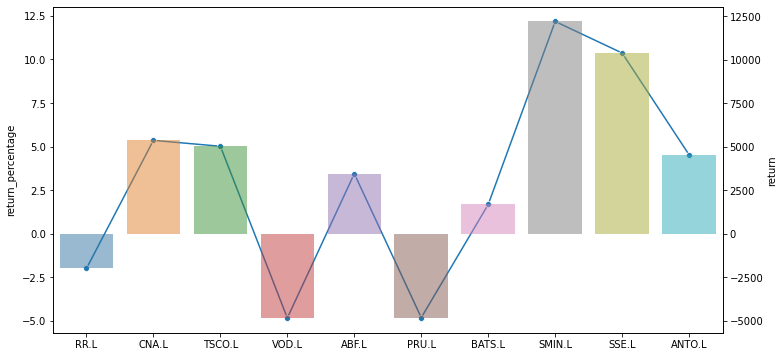

In [41]:
strat_plot(backtest_strat)
strat_plot(backtest_mom)